<a href="https://colab.research.google.com/github/jorgeP16/IA_2025/blob/main/EDA_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis eda
conjunto de estadisticas cuyo objetivo es explorar, describir y resumir la naturaleza de los datos

pasos


1.   Realizar un analisis descriptivo
2.   Elemento de la lista
3.   Detectar y tratar datos ausentes (NaN)
4.   Identificar datos atípicos y tratarlos






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/titanic-train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
833,834,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C
520,521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.5000,B73,S
358,359,1,3,"McGovern, Miss. Mary",female,NaN,0,0,330931,7.8792,NaN,Q
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
664,665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S


1. Definir el problema
- caracterizar quienes sobrevivieron a la tragedia del Titanic
-Jack se hubiera salvado si Rose le hubiera permitido subir a la puerta

2. Exploracion de datos
* Survived: 0 = Murió, 1 = sobrevivio
* Pclass: Clase del tiquete. 1 = 1st, 2 = 2nd, 3 = 3rd
* sisbsp # de hermanos
* parch:# de padres/hijos
* cabin: No. de la cabina
* embarked: Punto de embarque C=chebourg, q=queenstown, s=southamphon


In [6]:
total=df.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [7]:
porcentaje=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentaje

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


##Analizando la relacion entre las caracteristicas con la probabilidad de supervivencia/mortalidad del TITANIC

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
def bar_chart(feature):
  survived=df[df['Survived']==1][feature].value_counts()
  dead=df[df['Survived']==0][feature].value_counts()
  test=pd.DataFrame([survived,dead])
  test.index=['Survived','Dead']
  test.plot(kind='bar',stacked=True,figsize=(10,5))


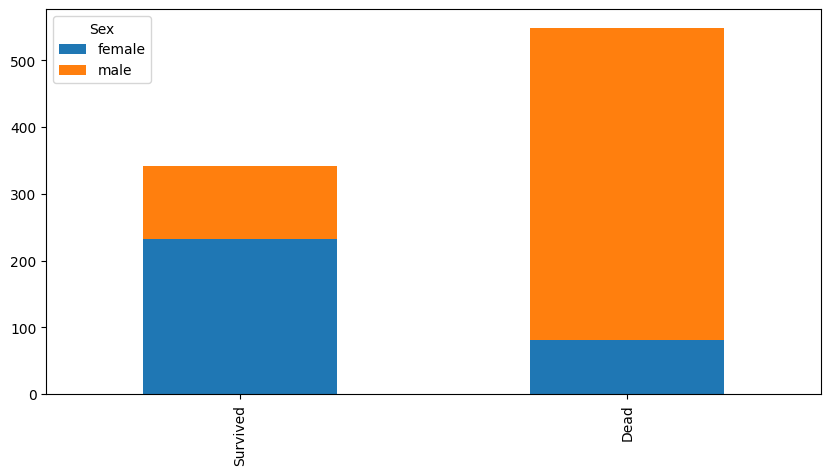

In [10]:
bar_chart("Sex")

La grafica señala que las mujer tiene casi 3 veces más posibilidades de sobrevivir que los hombre.

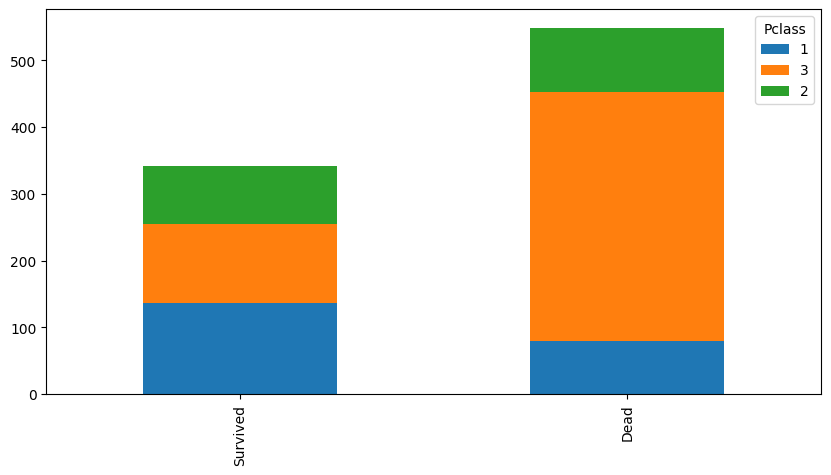

In [11]:
bar_chart("Pclass")

La grafica señala que la clase alta tuvo mayot probabilidad de supervivencia con respescto a
**otras clases.**
La grafica señala que la clase 3 **fallecio mas** en comparacion a **otras clases**

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

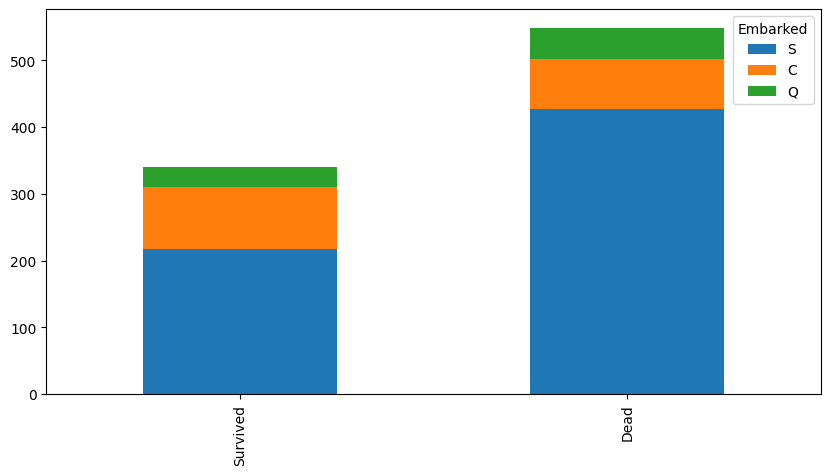

In [13]:
bar_chart("Embarked")

La grafica confirma que
* una persona que **aborda desde C** tuvo una ligera probabilidad de sobrevivir
* si una persona que aborda **Q o S** probablemente murio

## Ingenieria de caracteristicas
Es el proceso de usar el dominio del conocimiento para crear nuevas caracteristicas (feature vector) y que logre que los algoritmos de machine_learning funcione correctamente.
Feature vector es un vector n-dimensional que representa un objeto. Muchos algortimos de ML requieren una representacion numerica de los

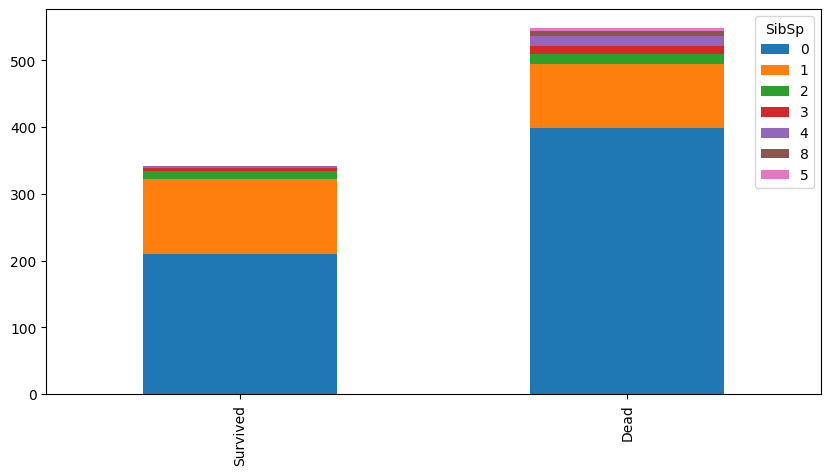

In [14]:
bar_chart("SibSp")

## creando nuevos vector features

In [15]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)
  return titles

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-4157432162.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)


In [16]:
df["Title"]=extract_title(df)
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


## 2.1 Crear un mapa de títulos
Se tomaran los valores mas representativos
* Mr: 0
* Miss: 1
* Mrs: 2
* Otros:3


In [18]:
def replace_titles(data):
  title_mapping={"Mr":"Señor", "Miss":"Señorita", "Mrs":"Señora"}
  data["Title"]=data["Title"].map(title_mapping).fillna("otros")
  return data

In [19]:
df=replace_titles(df)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Señor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Señora
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Señorita
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Señora
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Señor
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Señor
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Señor
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,otros
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Señora
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Señora


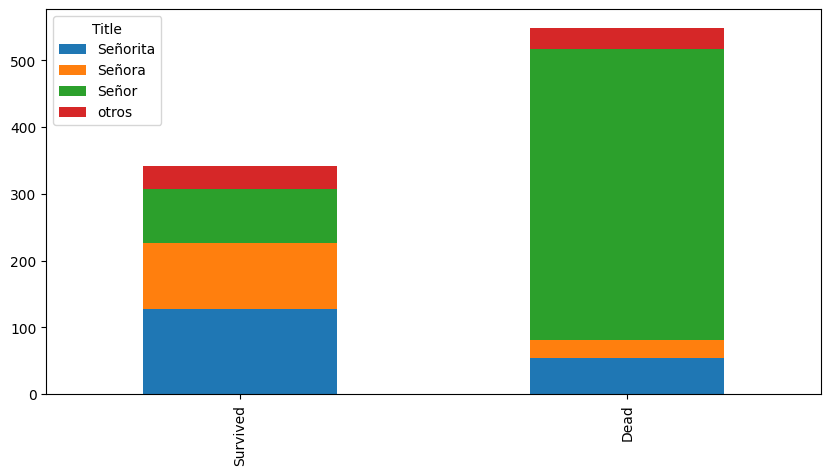

In [20]:
bar_chart("Title")

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [22]:
#Eliminando features que no nos sirven
df.drop(["Name", "Ticket", "Cabin"],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Señor
1,2,1,1,female,38.0,1,0,71.2833,C,Señora
2,3,1,3,female,26.0,0,0,7.9250,S,Señorita
3,4,1,1,female,35.0,1,0,53.1000,S,Señora
4,5,0,3,male,35.0,0,0,8.0500,S,Señor


## 2.2 Arreglando las edades faltantes
Se emplearan los titulos para llenar las edades faltantes

In [23]:
title_age_means=df.groupby("Title")["Age"].mean()
title_age_means

,Age
Title,
Señor,32.368090
Señora,35.898148
Señorita,21.773973
otros,20.430161


In [24]:
df["Age"]=df.apply(lambda row: title_age_means[row["Title"]] if pd.isnull(row["Age"]) else row["Age"],axis=1)
df.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.00000,1,0,7.2500,S,Señor
1,2,1,1,female,38.00000,1,0,71.2833,C,Señora
2,3,1,3,female,26.00000,0,0,7.9250,S,Señorita
3,4,1,1,female,35.00000,1,0,53.1000,S,Señora
4,5,0,3,male,35.00000,0,0,8.0500,S,Señor
5,6,0,3,male,32.36809,0,0,8.4583,Q,Señor
6,7,0,1,male,54.00000,0,0,51.8625,S,Señor
7,8,0,3,male,2.00000,3,1,21.0750,S,otros
8,9,1,3,female,27.00000,0,2,11.1333,S,Señora
9,10,1,2,female,14.00000,1,0,30.0708,C,Señora


In [25]:
df.Age.isnull().sum()

np.int64(0)

In [29]:
def classify_age_group(age):
  if age <= 12:
    return "Niño"
  elif 13 <= 19:
    return  "Adolescente"
  elif 20 <= 35:
    return "Joven Adulto"
  elif 36<= 60:
    return "Adulto"
  else:
    return "Adulto Mayor"

df["Age_Group"] = df["Age"].apply(classify_age_group)
display(df.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Group
0,1,0,3,male,22.0,1,0,7.2500,S,Señor,Adolescente
1,2,1,1,female,38.0,1,0,71.2833,C,Señora,Adolescente
2,3,1,3,female,26.0,0,0,7.9250,S,Señorita,Adolescente
3,4,1,1,female,35.0,1,0,53.1000,S,Señora,Adolescente
4,5,0,3,male,35.0,0,0,8.0500,S,Señor,Adolescente


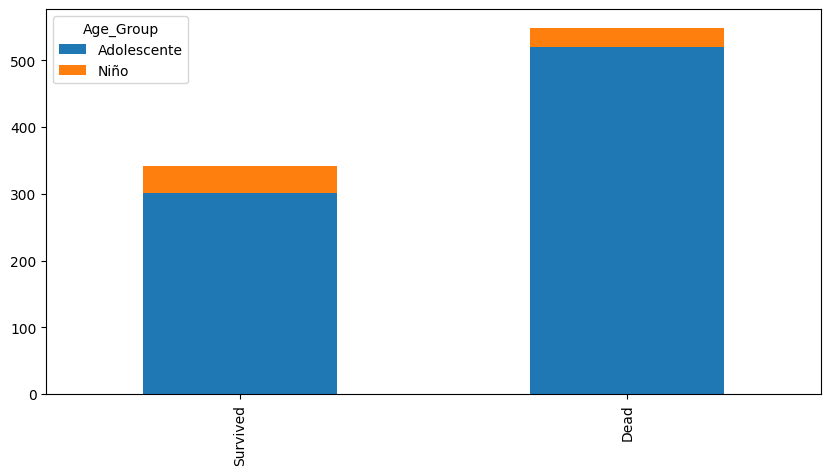

In [31]:
bar_chart("Age_Group")

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

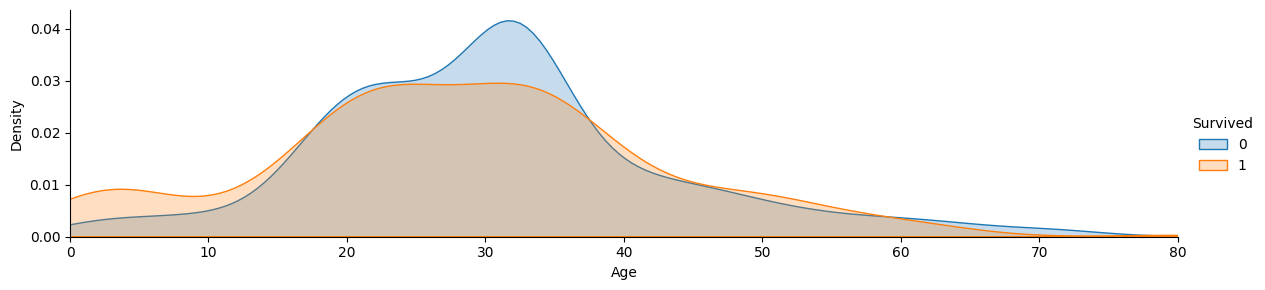

In [34]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()

plt.show


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

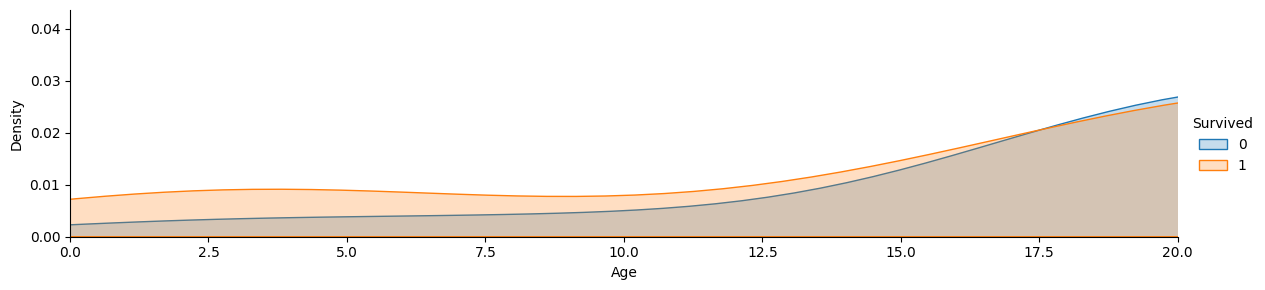

In [35]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(0,20)


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(20.0, 40.0)

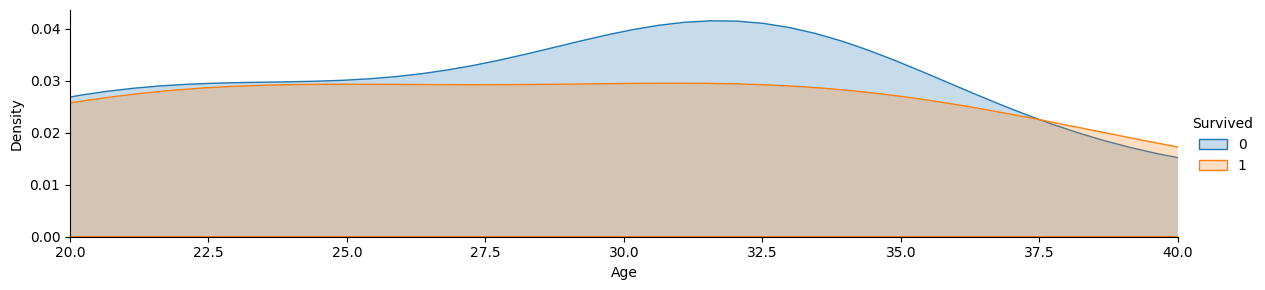

In [36]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(20,40)

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(40.0, 80.0)

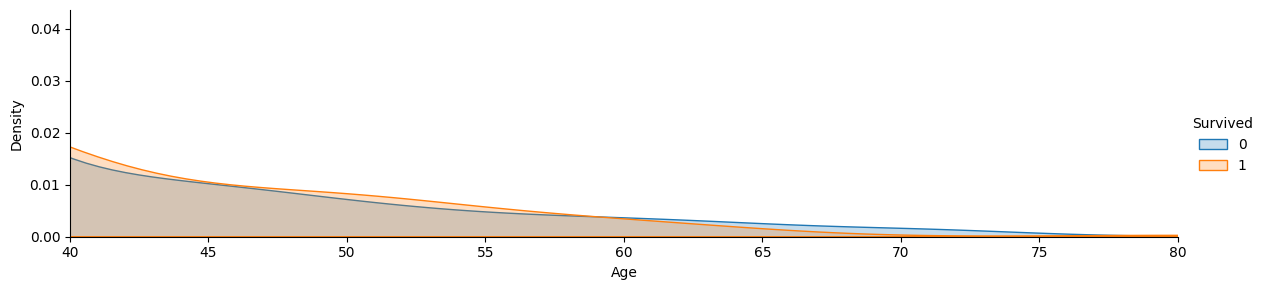

In [37]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(40,80)

####4.2. Binning
Convertir una variable numérica a categórias

Mapeo de feature vector:
- child:0
- Young:1
- adult:2
- mid-age:3
- senior:4

In [38]:
for dataset in df:
  dataset.loc[dataset["Age"]<=12,"Age"]=0
  dataset.loc[dataset["Age"]>12 & (dataset.loc["age"]<=18),"Age"]=1
  dataset.loc[dataset["Age"]>18 & (dataset.loc["age"]<=35),"Age"]=2
  dataset.loc[dataset["Age"]>35 & (dataset.loc["age"]<=60),"Age"]=3
  dataset.loc[dataset["Age"]<=60,"Age"]=4





AttributeError: 'str' object has no attribute 'loc'

In [39]:
bin=[0,12,18,35,60,120]
labels=["child","Young","adult","mid-age","senior"]
df["Age_Group"]=pd.cut(df["Age"],bins=bin,labels=labels, right=False)

In [40]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Group
0,1,0,3,male,22.0,1,0,7.2500,S,Señor,adult
1,2,1,1,female,38.0,1,0,71.2833,C,Señora,mid-age
2,3,1,3,female,26.0,0,0,7.9250,S,Señorita,adult
3,4,1,1,female,35.0,1,0,53.1000,S,Señora,mid-age
4,5,0,3,male,35.0,0,0,8.0500,S,Señor,mid-age


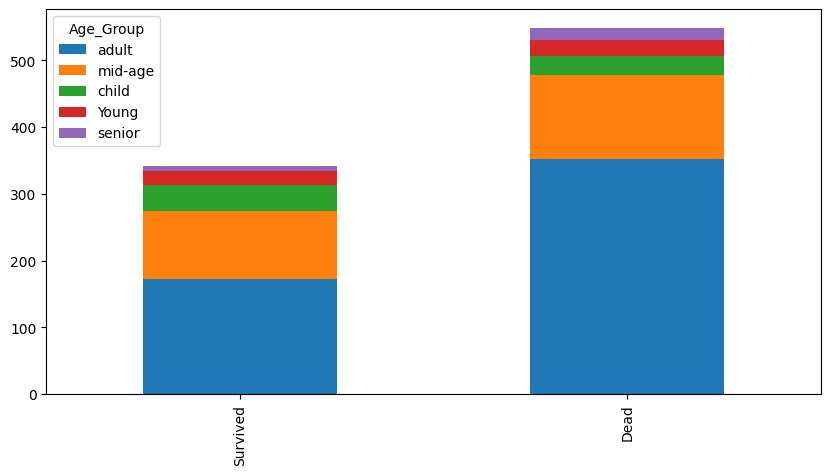

In [44]:
bar_chart("Age_Group")